In [50]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

In [51]:
mnist=fetch_openml('mnist_784', version=1, cache=True, as_frame=False)
# fashion_mnist=fetch_openml(name='Fashion-MNIST')

c:\Users\admin\anaconda3\lib\site-packages\sklearn\datasets\_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [52]:
mnist

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'frame': None,
 'categories': {},
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixe

In [53]:
X=mnist.data
y=mnist.target
X[0]


array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

In [54]:
y[0]

'5'

In [55]:
y=y.astype(np.int8)
y

array([5, 0, 4, ..., 4, 5, 6], dtype=int8)

In [56]:
X=X/255
X[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

레이블


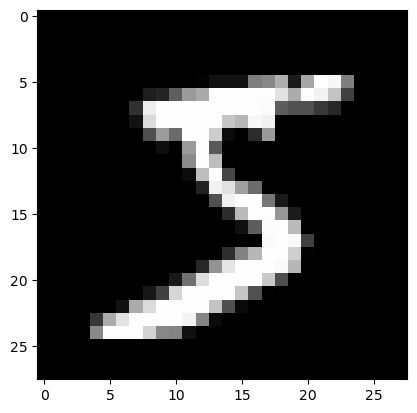

In [57]:
plt.imshow(X[0].reshape(28,28), cmap='gray')
print('레이블')
plt.show()

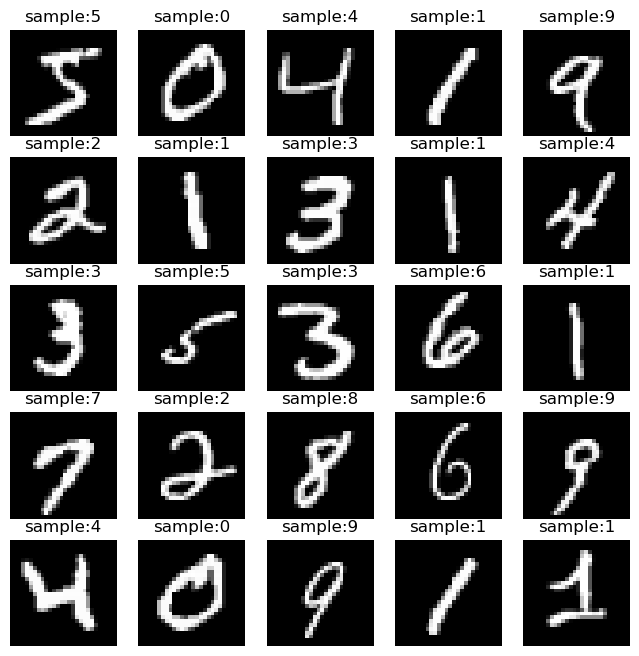

In [58]:
plt.figure(figsize=(8,8))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.axis('off')
    plt.imshow(X[i].reshape(28,28), cmap='gray', interpolation='nearest')
    plt.title("sample:%d"%y[i])
plt.show()

In [59]:
print(X.shape,y.shape)

(70000, 784) (70000,)


In [60]:
import torch
from torch.utils.data import TensorDataset,DataLoader
from sklearn.model_selection import train_test_split

In [61]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=1/7,random_state=0)

X_train=torch.Tensor(X_train)
X_test=torch.Tensor(X_test)
y_train=torch.LongTensor(y_train)
y_test=torch.LongTensor(y_test)

print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

torch.Size([60000, 784]) torch.Size([10000, 784]) torch.Size([60000]) torch.Size([10000])


In [62]:
ds_train=TensorDataset(X_train,y_train)
ds_test=TensorDataset(X_test,y_test)


In [63]:
loader_train=DataLoader(ds_train,batch_size=64,shuffle=True)
loader_test=DataLoader(ds_test,batch_size=64,shuffle=True)

In [64]:
from torch import nn

model=nn.Sequential()
model.add_module('fc1',nn.Linear(28*28*1,100))
model.add_module('relu1',nn.ReLU())
model.add_module('fc2',nn.Linear(100,100))
model.add_module('relu2',nn.ReLU())
model.add_module('fc3',nn.Linear(100,10))

print(model)

Sequential(
  (fc1): Linear(in_features=784, out_features=100, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=100, out_features=100, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=100, out_features=10, bias=True)
)


In [65]:
from torch import optim
loss_fn=nn.CrossEntropyLoss()

optimizer=optim.Adam(model.parameters(), lr=0.01)


In [76]:
costs, accuracys, epochs=[],[],[]

In [77]:
def train(epoch):
    model.train()
    cost=0
    accuracy=0

    for data, targets in loader_train:
        optimizer.zero_grad()
        outputs=model(data)
        loss=loss_fn(outputs, targets)

        _, y_hat=torch.max(outputs.data, 1)
        accuracy+=y_hat.eq(targets.data.view_as(y_hat)).sum()
        cost+=loss.item()
        loss.backward()
        optimizer.step()
        
    epochs.append(epoch)
    costs.append(cost)
    accuracys.append(accuracy.detach().numpy()/60000)
    print("epoch{}:cost={}, Accuracy={}\n".format(epoch, cost, accuracy/60000))

In [78]:
def test():
    model.eval() #신경망을 추론(예측) 모드로 전환
    correct=0

    with torch.no_grad(): #추론(예측)과정에서 미분을 하지 않게 해줌
        for data, targets in loader_test:
            outputs=model(data)
            _, prodicted=torch.max(outputs.data,1)
            correct+=prodicted.eq(targets.data.view_as(prodicted)).sum()
    data_num=len(loader_test.dataset)
    print("\n테스트 데이터에서 예측 정확도:{}/{}({:.2f}%)\n".format(correct,data_num,100. * correct /data_num))


In [79]:
test()


테스트 데이터에서 예측 정확도:9586/10000(95.86%)



In [81]:
for epoch in range(10):
    train(epoch)
test()

epoch0:cost=72.16073329426581, Accuracy=0.9804333448410034

epoch1:cost=67.55978938798216, Accuracy=0.9821666479110718

epoch2:cost=67.39368589106016, Accuracy=0.9822499752044678

epoch3:cost=65.72565898446919, Accuracy=0.9824666380882263

epoch4:cost=59.55496368750755, Accuracy=0.9844666719436646

epoch5:cost=65.2881018148837, Accuracy=0.9827499985694885

epoch6:cost=54.80639110351785, Accuracy=0.9855333566665649

epoch7:cost=60.70927587579354, Accuracy=0.984499990940094

epoch8:cost=56.46719508519709, Accuracy=0.9861500263214111

epoch9:cost=52.33732685569248, Accuracy=0.9865166544914246


테스트 데이터에서 예측 정확도:9683/10000(96.83%)



output =  tensor([ -50.8908,  -41.9998,   -7.5786,   -1.8250,   -5.7811,  -58.8120,
        -201.9854,   29.3808,  -64.8470,  -14.3431], grad_fn=<AddBackward0>)
pred =  torch.return_types.max(
values=tensor(29.3808),
indices=tensor(7))
predicted =  tensor(7)
예측 결과 : 7


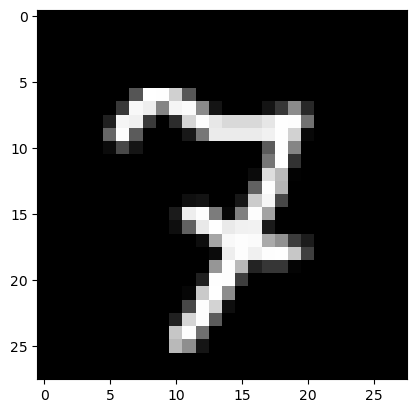

In [95]:
index=100
model.eval()
data=X_test[index]
output=model(data)
print("output = ",output)
pred=torch.max(output.data,0)
print("pred = ", pred)
_, predicted=torch.max(output.data,0) #확률이 가장 높은 레이블이 무엇인지 계산
print("predicted = ",predicted)

print("예측 결과 : {}".format(predicted))

X_test_show=(X_test[index]).numpy()
plt.imshow(X_test_show.reshape(28,28), cmap='gray')
plt.show()

In [102]:
predictions=model(X_test)
predicted=[]
for i in range(len(predictions)):
    v, idx=torch.max(predictions[i],0)
    predicted.append(idx.item())
predicted=torch.from_numpy(np.array(predicted))
print(predicted)
print(y_test)

tensor([0, 4, 1,  ..., 1, 3, 0], dtype=torch.int32)
tensor([0, 4, 1,  ..., 1, 3, 0])


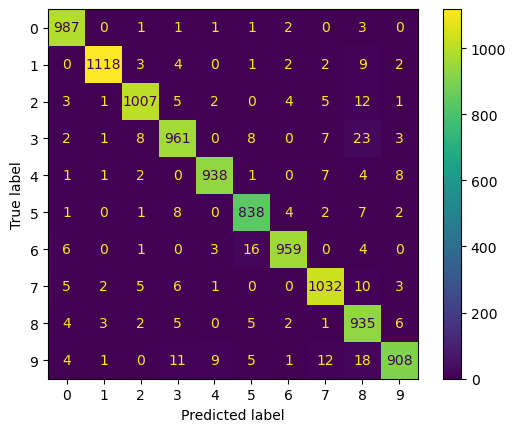

In [104]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm=confusion_matrix(y_test, predicted)
ConfusionMatrixDisplay(cm).plot()

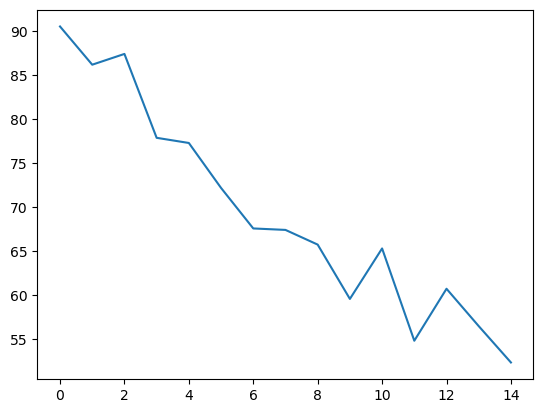

In [105]:
plt.plot(costs)

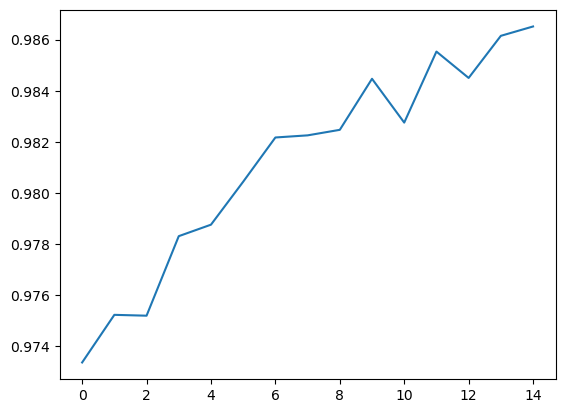

In [106]:
plt.plot(accuracys)